In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat, savemat

In [6]:
saturation = np.zeros((40,128,128))
pressure = np.zeros((40,128,128))
timesteps = np.zeros((40,1))
wellsol = np.zeros((40,4,3))

#states = loadmat('results/states/states_818.mat', simplify_cells=True)['states']
states = loadmat('results/states/states_2.mat', simplify_cells=True)['states']


for t in range(40):
    timesteps[t] = states[t]['time'] / (60*60*24*365.245)
    saturation[t] = states[t]['s'][:,1].reshape(128,128)
    pressure[t] = states[t]['pressure'].reshape(128,128)

    for w in range(4):
        wellsol[t,w,0] = -states[t]['wellSol'][w+1]['qOr'] * (3.28084**3) / 5.615 * (60*60*24)
        wellsol[t,w,1] = -states[t]['wellSol'][w+1]['qWr'] * (3.28084**3) / 5.615 * (60*60*24)
        wellsol[t,w,2] = states[t]['wellSol'][w+1]['wcut']

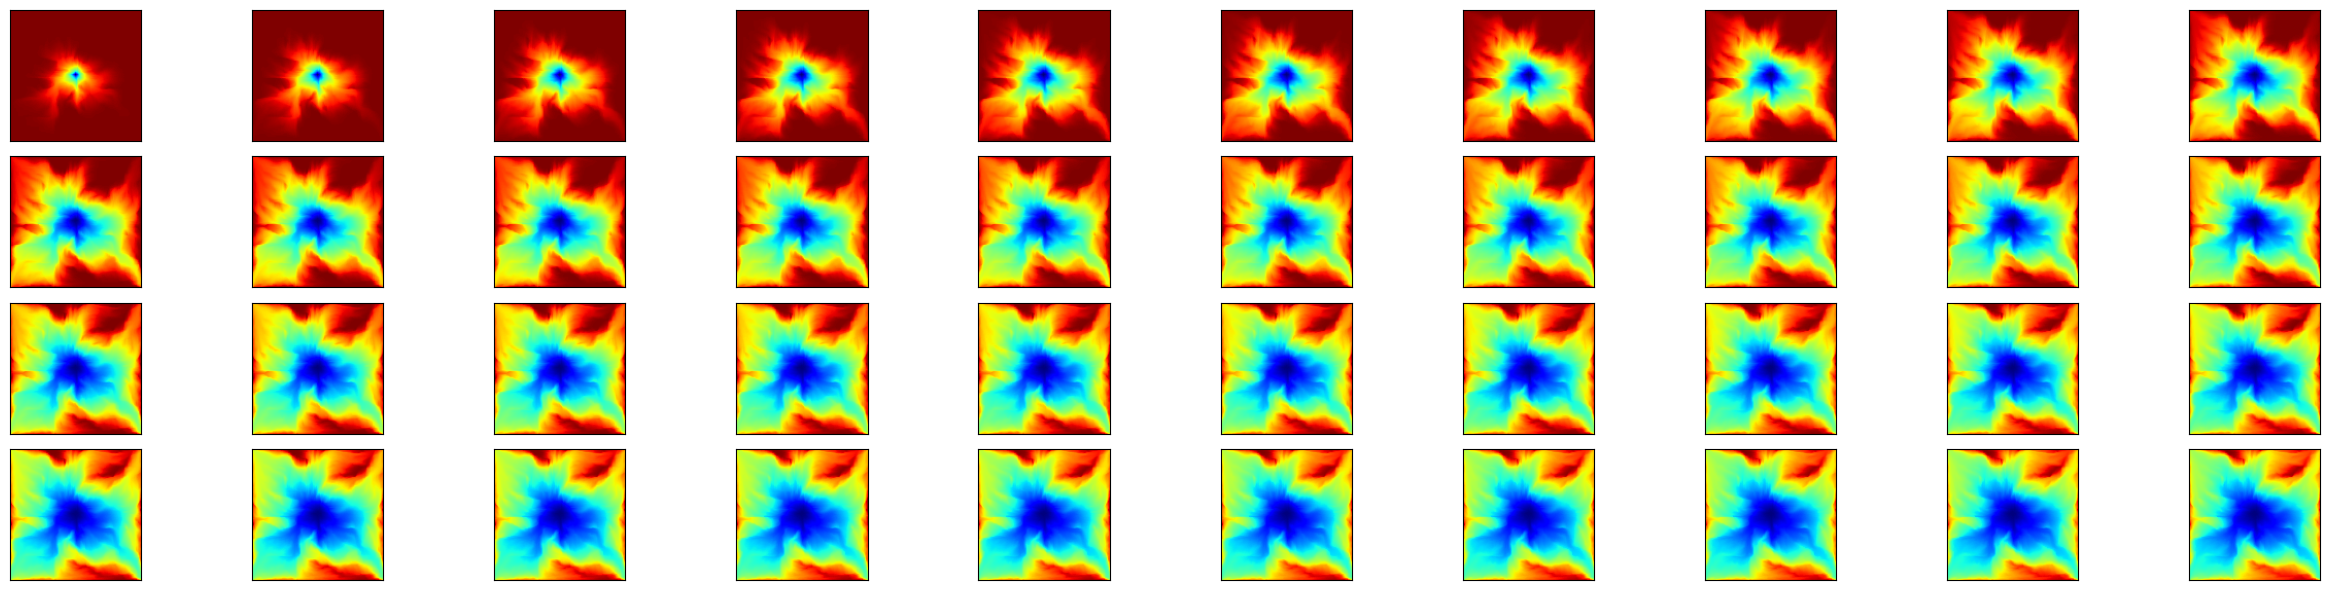

In [7]:
plt.figure(figsize=(25,6))
for i in range(40):
    plt.subplot(4, 10, i+1)
    plt.imshow(saturation[i], cmap='jet')
    plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()

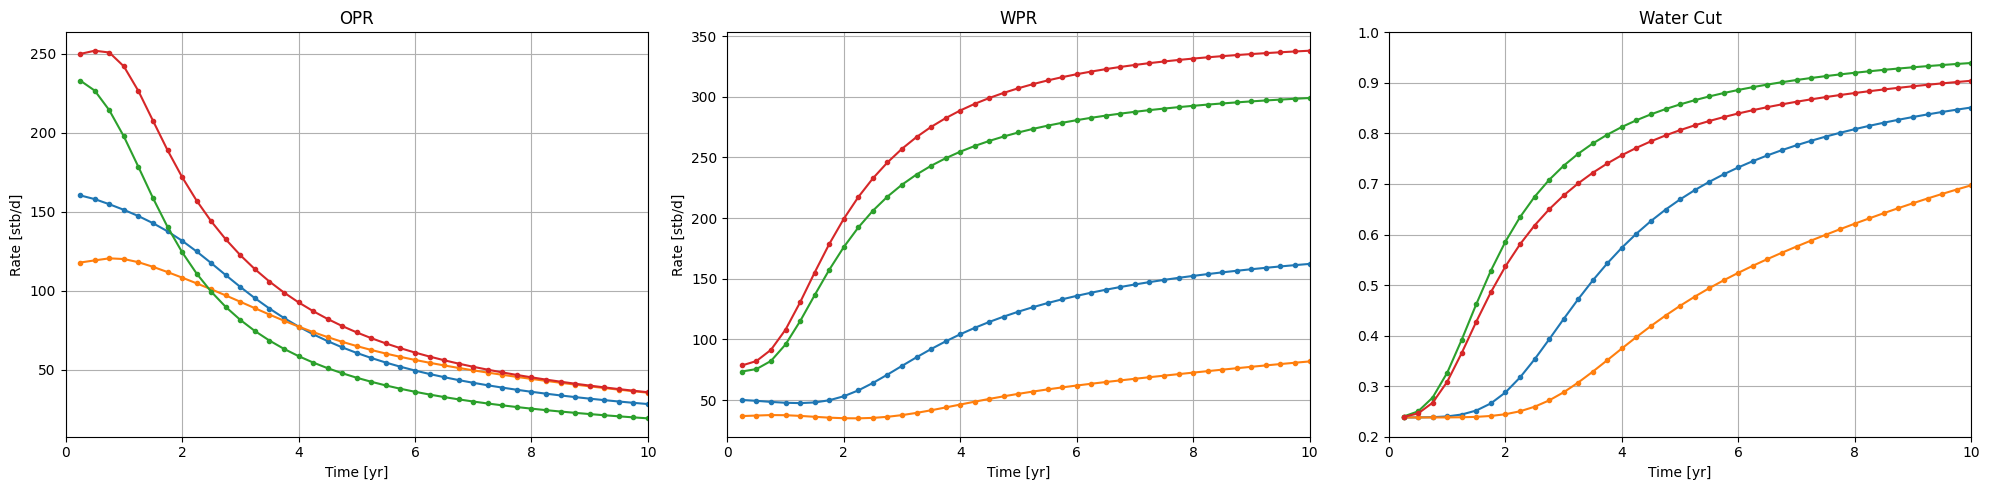

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True)
ax1, ax2, ax3 = axs.flatten()

ax1.plot(timesteps, wellsol[:,:,0], '.-')
ax2.plot(timesteps, wellsol[:,:,1], '.-')
ax3.plot(timesteps, wellsol[:,:,2], '.-')

ax3.set(ylim=(0.2,1))
[a.grid(True, which='both') for a in axs]
[a.set(xlim=(0,10), xlabel='Time [yr]') for a in axs]
[a.set(title=['OPR','WPR','Water Cut'][i]) for i,a in enumerate(axs)]
[a.set(ylabel='Rate [stb/d]') for i,a in enumerate(axs) if i < 2]

plt.tight_layout()
plt.show()

***
# END